# Аналитика данных медицинского центра

**Описание**

Провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года.

**Цель исследования:**

Определить ключевые драйверы изменения цены лечения.

**План работы:**

- Выгрузить и предобработать данные
- Проанализировать данные
- Написать общий вывод

## Просмотр общей информации в датафрейме

In [ ]:
# импортируем необходимые библиотеки

import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# загружаем датасет

from google.colab import files
uploaded = files.upload()

In [ ]:
# считываем и сохраняем данные

try:
  data = pd.read_excel(io.BytesIO(uploaded['data_test_task_2022.xlsx']))
except:
  data = pd.read_excel('data_test_task_2022.xlsx')

data.head(20)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,2.0,26
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,2.0,26
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2.0,26
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,2.0,26
9,30268157903,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,2.0,26


In [ ]:
# смотрим общую информацию

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB
None


In [ ]:
data['service_amount'].describe()

count    85369.000000
mean      1166.094636
std        799.062660
min        147.000000
25%        550.000000
50%       1155.000000
75%       1530.000000
max      26999.000000
Name: service_amount, dtype: float64

**Вывод**

- В данных представлено 85 тысяч строк и 8 столбцов
- Есть несколько пропусков в колонке с полом, значения в котором можно определить по названию процедур (1 - мужчина, 2 - женщина)
- Столбцы с датой и полом имеют некорректный формат
- Максимальная цена услуги - 26 999, минимальная - 147

## Предобработка данных

### Обработка пропусков

In [ ]:
# считаем пропуски

data.isna().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

In [ ]:
# выводим пропуски в столбце пола

data[data['sex_id'].isna()]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


In [ ]:
# проверяем наличие значений пола у этих же пациентов по id

display(data[(data['insured'] == 512590) & (data['sex_id'].notnull())])
print()
display(data[(data['insured'] == 221581) & (data['sex_id'].notnull())])

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
29311,31408954403,2021-09-24,Прием первичный,1470,1,512590,2.0,27
29312,31408954503,2021-09-25,Рентгенография крупного сустава (2 снимка),1575,1,512590,2.0,27
29313,31408954603,2021-09-25,Ультразвуковое исследование сустава,1890,1,512590,2.0,27
29314,31408954703,2021-09-27,Прием повторный,1313,1,512590,2.0,27


,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date


In [ ]:
# удаляем строки с пропусками и заполняем пропущенные значения

data = data.drop(index=[8880, 8881, 12357, 17987])

data['sex_id'] = data['sex_id'].fillna(2.0)

In [ ]:
data.isna().sum()

record_id               0
service_date            0
service_name            0
service_amount          0
service_number          0
insured                 0
sex_id                  0
age_for_service_date    0
dtype: int64

### Приведение к корректному типу

In [ ]:
# меняем типы данных и приводим значения к корректному типу

data['sex_id'] = data['sex_id'].astype(int)
data['service_date'] = pd.to_datetime(data['service_date'])

data['service_name'] = data['service_name'].str.lower()
data['service_name'] = data['service_name'].str.replace('ё', 'е')
data['service_name'] = data['service_name'].str.replace(',,', ',')

### Поиск дубликатов и аномалий

In [ ]:
# считаем дубликаты

data.duplicated().sum()

0

In [ ]:
# выводим уникальные значения в столбце пола

print(data['sex_id'].unique())

[2 1]


In [ ]:
# проверяем максимальный и минимальный возраст на наличие выбросов

data['age_for_service_date'].describe()

count    85365.000000
mean        33.851309
std         12.144802
min          0.000000
25%         27.000000
50%         34.000000
75%         41.000000
max         83.000000
Name: age_for_service_date, dtype: float64

### Добавление столбцов для анализа


In [ ]:
# создаём вспомогательные столбцы суммы, года, возрастной категории и пола

data['total_amount'] = data['service_amount'] * data['service_number']
data['year'] = data['service_date'].dt.year
data['month'] = data['service_date'].dt.month

def age_category(x):
  if 0 <= x <= 17:
    return 'Несовершеннолетний'
  elif 18 <= x <= 44:
    return 'Молодой'
  elif 45 <= x <= 59:
    return 'Среднего возраста'
  elif 60 <= x <= 74:
    return 'Пожилой'
  elif 75 <= x <= 83:
    return 'Долгожитель'

data['age_category'] = data['age_for_service_date'].apply(age_category)

def sex(a):
  if a == 1:
    return 'Мужчина'
  else:
    return 'Женщина'

data['sex'] = data['sex_id'].apply(sex)

In [ ]:
data['total_amount'].describe()

count    85365.000000
mean      1209.318093
std       1133.324185
min        147.000000
25%        550.000000
50%       1190.000000
75%       1540.000000
max      61440.000000
Name: total_amount, dtype: float64

In [ ]:
# категоризируем суммарные затраты

def amount_category(a):
  if a < 550:
    return 'Дёшево'
  elif 550 <= a < 1190:
    return 'Средне'
  elif 1190 <= a <= 1540:
    return 'Выше среднего'
  else:
    return 'Дорого'

data['amount_category'] = data['total_amount'].apply(amount_category)

**Вывод**

- Заполнили пропуски в столбце с id пола. Для одного клиента пропуски были скорее всего из-за технический ошибки, т.к в других записях пол был указан
- Удалили колонки с пропущенными значениями, это не повлияет на результат анализа, потому что из было менее 1%
- Привели типы данных в столбцах к правильному виду и значения в столбце с названием процедур к корректному типу
- Проверили дубликаты и наличие аномальных значений в возрастах
- Создали вспомогательные столбцы для проверки гипотез

## Анализ данных

year,2021,2022
month,,
1,2326105.0,4952520.0
2,2450769.0,5486475.0
3,4051710.0,6690440.0
4,4609198.0,8325800.0
5,4556170.0,7825970.0
6,4716678.0,7052700.0
7,4014041.0,6406310.0
8,4493035.0,3855083.0
9,4982495.0,NaN


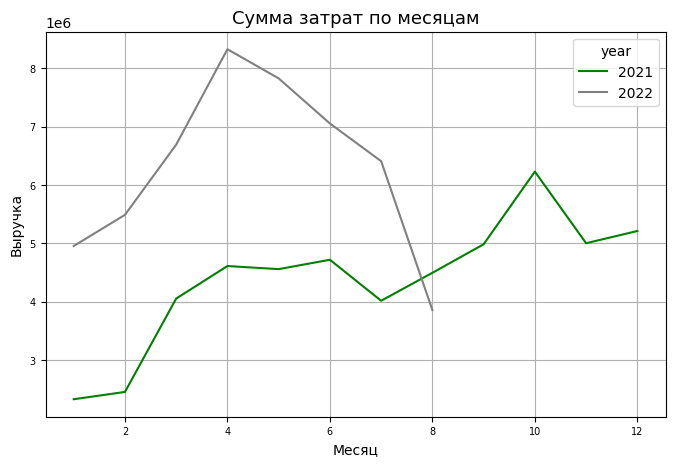

In [ ]:
# группируем данные по месяцу, году и считаем суммарную выручку

month_sum = data.pivot_table(index='month', columns='year', values='total_amount', aggfunc='sum')
display(month_sum)

# строим график

month_sum.plot(figsize=(8, 5), grid=True, color=['green', 'grey'])

plt.title('Сумма затрат по месяцам', size=13)
plt.xlabel('Месяц', size=10)
plt.ylabel('Выручка', size=10)
plt.xticks(size=7)
plt.yticks(size=7)

plt.show()

**Вывод**

Сумма затрат растёт на протяжении всего 2021 года, особенно со 2 и 9 месяцев. С февраля 2022 наблюдается огромный рост затрат, после чего снижается до уровня 2021 года.

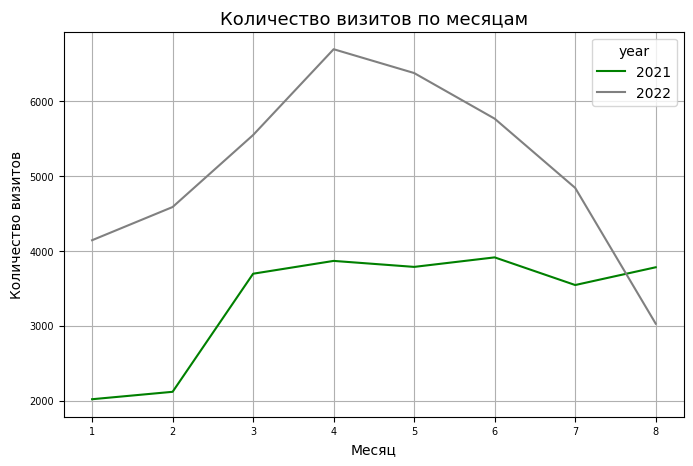

In [ ]:
count_client = data.query('month == [1, 2, 3, 4, 5, 6, 7, 8]').pivot_table(index='month', columns='year', values='service_name', aggfunc='count')

count_client.plot(figsize=(8, 5),
                  grid=True,
                  color=['green', 'grey'])

plt.title('Количество визитов по месяцам', size=13)
plt.xlabel('Месяц', size=10)
plt.ylabel('Количество визитов', size=10)
plt.xticks(size=7)
plt.yticks(size=7)

plt.show()

**Вывод**

Количество визитов в 2022 году почти в 2 раза больше, но после 4 месяца идёт снижение каждый месяц, за 8 месяц данные представлены только за 20 дней.

,count
sex,
Женщина,16561
Мужчина,10171


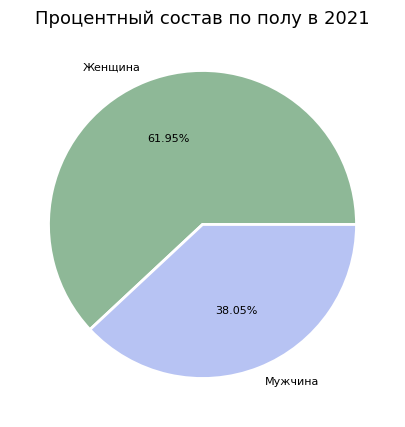

,count
sex,
Женщина,25795
Мужчина,15182


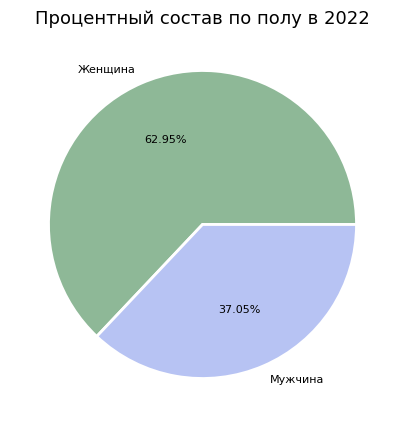

In [ ]:
# группируем по полу и считаем количество каждого по 2021 году

sex_category_21 = data.query('year == 2021 & month == [1, 2, 3, 4, 5, 6, 7, 8]').pivot_table(index='sex', values='service_name', aggfunc='count')
sex_category_21.columns = ['count']
display(sex_category_21)

# выделяем количество и названия

df = sex_category_21['count']
labels = data['sex'].unique()

# строим пай чарт

plt.figure(figsize=(8, 5))

plt.pie(df,
        labels=labels,
        textprops={'size' : 8},
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'},
        autopct='%.2f%%',
        colors=['#8EB897', '#B7C3F3'])

plt.title('Процентный состав по полу в 2021', size=13)

plt.show()

# повторяем то же самое для 2022 года

sex_category_22 = data.query('year == 2022').pivot_table(index='sex', values='service_name', aggfunc='count')
sex_category_22.columns = ['count']
display(sex_category_22)

df2 = sex_category_22['count']
labels2 = data['sex'].unique()

plt.figure(figsize=(8, 5))

plt.pie(df2,
        labels=labels2,
        textprops={'size' : 8},
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'},
        autopct='%.2f%%',
        colors=['#8EB897', '#B7C3F3'])

plt.title('Процентный состав по полу в 2022', size=13)

plt.show()

**Вывод**

Клиентов среди женщин увеличилось на 9 тысяч, а мужчин на 5 тысячи. В сравнении женщин увеличилось на 1%, а мужчин соответственно снизилось на 1%.

sex,Женщина,Мужчина
month,,
1,1442403,883702
2,1641078,809691
3,2593973,1457737
4,2917743,1691455
5,2975580,1580590
6,2945481,1771197
7,2189750,1824291
8,2670464,1822571


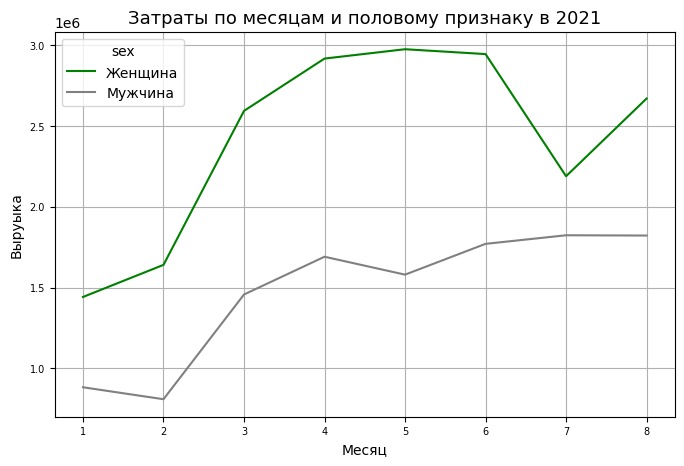

sex,Женщина,Мужчина
month,,
1,2830040,2122480
2,3226915,2259560
3,4018750,2671690
4,5498280,2827520
5,5409500,2416470
6,4661540,2391160
7,3907029,2499281
8,2596387,1258696


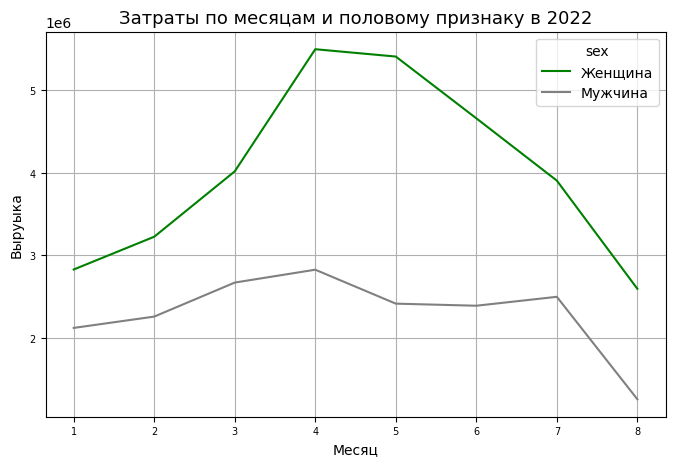

In [ ]:
# отбираем мужчин и женщин с суммарными затратами по каждому месяцу

month_sum = data.query('year == 2021 & month == [1, 2, 3, 4, 5, 6, 7, 8]').pivot_table(index='month', columns='sex', values='total_amount', aggfunc='sum')
display(month_sum)

# строим линейный график

month_sum.plot(figsize=(8, 5), grid=True, color=['green', 'grey'])

plt.title('Затраты по месяцам и половому признаку в 2021', size=13)
plt.xlabel('Месяц', size=10)
plt.ylabel('Выруыка', size=10)
plt.xticks(size=7)
plt.yticks(size=7)

plt.show()

# повторяем для другого года

month_sum = data.query('year == 2022').pivot_table(index='month', columns='sex', values='total_amount', aggfunc='sum')
display(month_sum)
month_sum.plot(figsize=(8, 5), grid=True, color=['green', 'grey'])

plt.title('Затраты по месяцам и половому признаку в 2022', size=13)
plt.xlabel('Месяц', size=10)
plt.ylabel('Выруыка', size=10)
plt.xticks(size=7)
plt.yticks(size=7)

plt.show()

**Вывод**

Затраты женщин в 2021 более резкие изменения, чем у мужчин, такая же тенденция и в 2022 году.

,count
age_category,
Молодой,19933
Среднего возраста,3775
Несовершеннолетний,2287
Пожилой,736
Долгожитель,1


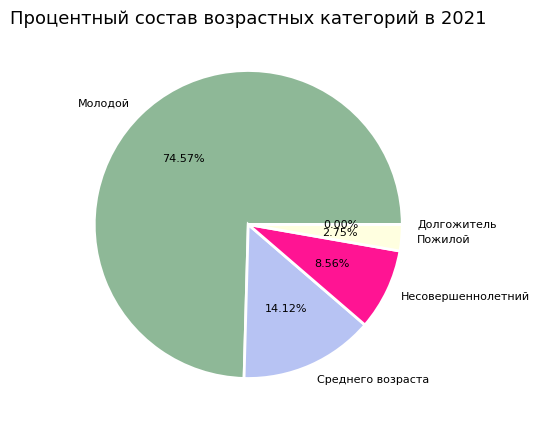

,count
age_category,
Молодой,31734
Среднего возраста,5567
Несовершеннолетний,2881
Пожилой,759
Долгожитель,36


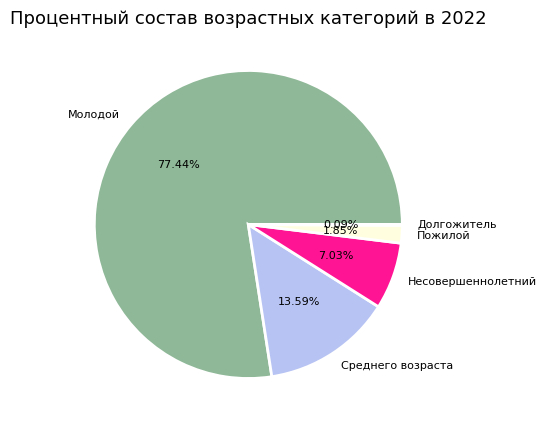

In [ ]:
# выделяем возрастные категории и считаем их количество

category_count = data.query('year == 2021 & month == [1, 2, 3, 4, 5, 6, 7, 8]').pivot_table(index='age_category', values='service_name', aggfunc='count')\
                                                                                  .sort_values(by='service_name', ascending=False)
category_count.columns = ['count']
display(category_count)

# сохраняем датафрейм и колонки для графика

df = category_count['count']
labels = data['age_category'].unique()

# выводим пай чарт

plt.figure(figsize=(8, 5))

plt.pie(df,
        labels=labels,
        textprops={'size' : 8},
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'},
        autopct='%.2f%%',
        colors=['#8EB897', '#B7C3F3', '#FF1493', '#FFFFE0', '#48D1CC'])

plt.title('Процентный состав возрастных категорий в 2021', size=13)

plt.show()

category_count = data.query('year == 2022').pivot_table(index='age_category', values='service_name', aggfunc='count')\
                                         .sort_values(by='service_name', ascending=False)
category_count.columns = ['count']
display(category_count)

df = category_count['count']
labels = data['age_category'].unique()

plt.figure(figsize=(8, 5))

plt.pie(df,
        labels=labels,
        textprops={'size' : 8},
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'},
        autopct='%.2f%%',
        colors=['#8EB897', '#B7C3F3', '#FF1493', '#FFFFE0', '#48D1CC'])

plt.title('Процентный состав возрастных категорий в 2022', size=13)

plt.show()

**Вывод**

Количество клиентов увеличилось во всех возрастных категориях, но в % соотношении в основном выросла только доля молодых, почти на 3%, и уменьшилось на 1.5% количество несовершеннолетних, возможно они "перешли" в категорию молодых.

,total_amount
age_category,
Молодой,22981535
Среднего возраста,4447377
Несовершеннолетний,2645852
Пожилой,1141472
Долгожитель,1470


C:\Users\amane\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amane\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


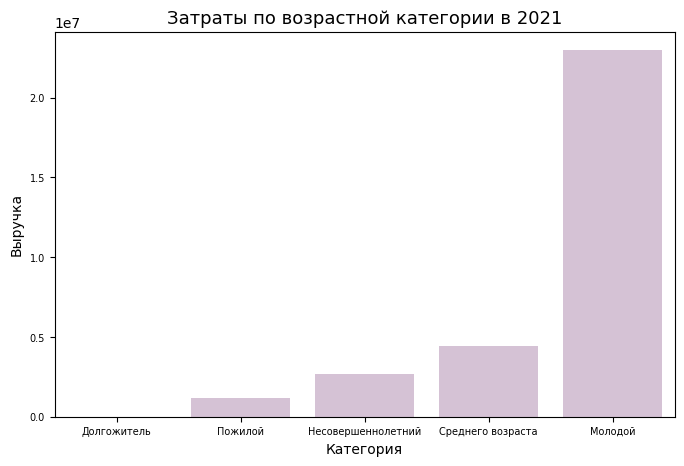

,total_amount
age_category,
Молодой,39534022
Среднего возраста,6676499
Несовершеннолетний,3368690
Пожилой,984577
Долгожитель,31510


C:\Users\amane\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amane\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


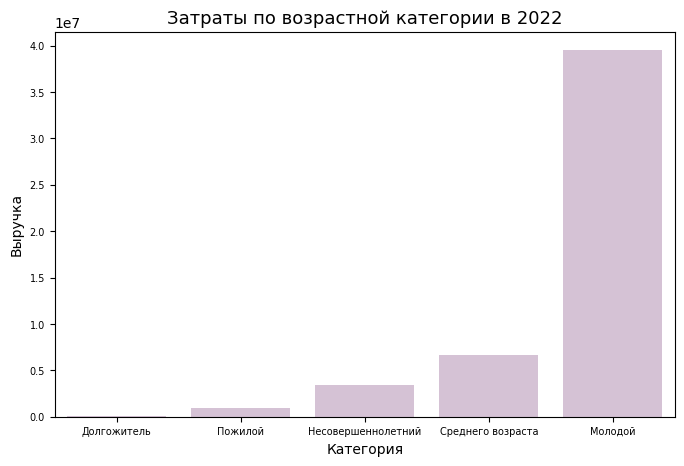

In [ ]:
# группируем возрастные категории по затратам

category_sum = data.query('year == 2021 & month == [1, 2, 3, 4, 5, 6, 7, 8]').pivot_table(index='age_category', values='total_amount', aggfunc='sum')\
                                                                                .sort_values(by='total_amount', ascending=False)
display(category_sum)
category_sum.reset_index(inplace=True)

plt.figure(figsize=(8, 5))

sns.barplot(data=category_sum,
            x='age_category',
            y='total_amount',
            order=category_sum.sort_values(by='total_amount').age_category,
            color='thistle')

plt.title('Затраты по возрастной категории в 2021', size=13)
plt.xlabel('Категория', size=10)
plt.ylabel('Выручка', size=10)
plt.xticks(size=7)
plt.yticks(size=7)

plt.show()

category_sum = data.query('year == 2022').pivot_table(index='age_category', values='total_amount', aggfunc='sum')\
                                         .sort_values(by='total_amount', ascending=False)
display(category_sum)
category_sum.reset_index(inplace=True)

plt.figure(figsize=(8, 5))

sns.barplot(data=category_sum,
            x='age_category',
            y='total_amount',
            order=category_sum.sort_values(by='total_amount').age_category,
            color='thistle')

plt.title('Затраты по возрастной категории в 2022', size=13)
plt.xlabel('Категория', size=10)
plt.ylabel('Выручка', size=10)
plt.xticks(size=7)
plt.yticks(size=7)

plt.show()

**Вывод**

Затраты среди молодых увелечились значительно, увеличились почти в 2 раза по сравнению с 2021 годом. Уменьшились затраты только у пожилых, возможно они "перешли" в категорию долгожители.

,category,male,female
0,Долгожитель,1,NaN
1,Пожилой,309,427.0
2,Несовершеннолетний,1024,1263.0
3,Среднего возраста,1353,2422.0
4,Молодой,7484,12449.0


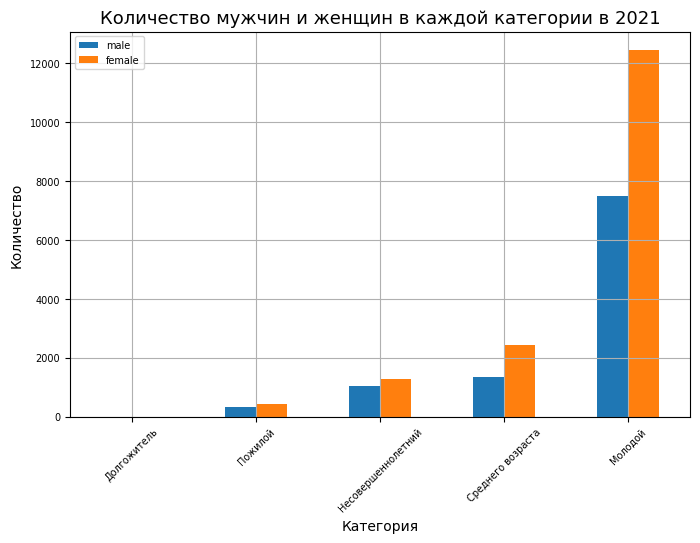

,category,male,female
0,Пожилой,354.0,405
1,Несовершеннолетний,1509.0,1372
2,Среднего возраста,1923.0,3644
3,Молодой,11396.0,20338
4,Долгожитель,NaN,36


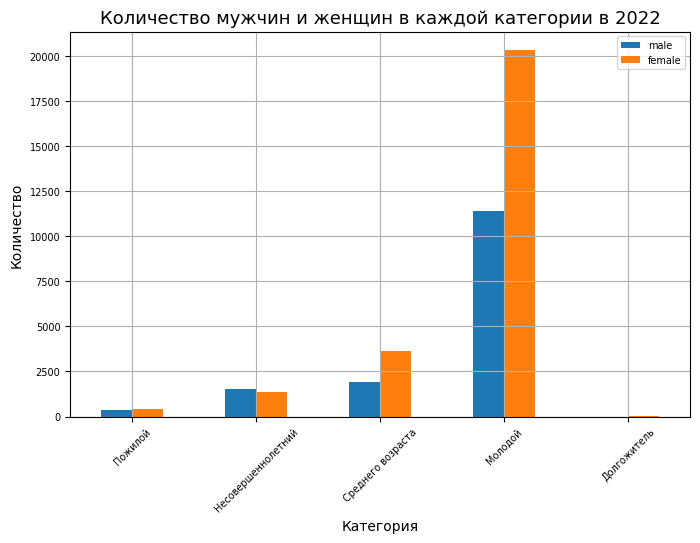

In [ ]:
# группируем возрастные категории по мужчинам

male_count = data.query('year == 2021 & month == [1, 2, 3, 4, 5, 6, 7, 8] & sex_id == 1').pivot_table(index='age_category', values='sex_id', aggfunc='count')\
                                                                                            .sort_values(by='sex_id', ascending=True)
male_count.reset_index(inplace=True)
male_count.columns = ['category', 'male']

# группируем возрастные категории по женщинам

female_count = data.query('year == 2021 & month == [1, 2, 3, 4, 5, 6, 7, 8] & sex_id == 2').pivot_table(index='age_category', values='sex_id', aggfunc='count')\
                                                                                              .sort_values(by='sex_id', ascending=True)
female_count.reset_index(inplace=True)
female_count.columns = ['category', 'female']

# соединяем 2 таблицы с количеством мужчин и женщин в каждой категории

table = male_count.merge(female_count, on='category', how='outer')
table.columns=['category', 'male', 'female']
display(table)

# строим столбчатый график

table.plot(kind='bar',
           x='category',
           rot=45,
           grid=True,
           figsize=(8, 5))

plt.title('Количество мужчин и женщин в каждой категории в 2021', size=13)
plt.xlabel('Категория', size=10)
plt.ylabel('Количество', size=10)
plt.xticks(size=7)
plt.yticks(size=7)
plt.legend(fontsize=7)

plt.show()

male_count = data.query('year == 2022 & sex_id == 1').pivot_table(index='age_category', values='sex_id', aggfunc='count')\
                                         .sort_values(by='sex_id', ascending=True)
male_count.reset_index(inplace=True)
male_count.columns = ['category', 'male']

female_count = data.query('year == 2022 & sex_id == 2').pivot_table(index='age_category', values='sex_id', aggfunc='count')\
                                         .sort_values(by='sex_id', ascending=True)
female_count.reset_index(inplace=True)
female_count.columns = ['category', 'female']

table = male_count.merge(female_count, on='category', how='outer')
table.columns=['category', 'male', 'female']
display(table)

table.plot(kind='bar',
           x='category',
           rot=45,
           grid=True,
           figsize=(8, 5))

plt.title('Количество мужчин и женщин в каждой категории в 2022', size=13)
plt.xlabel('Категория', size=10)
plt.ylabel('Количество', size=10)
plt.xticks(size=7)
plt.yticks(size=7)
plt.legend(fontsize=7)

plt.show()

**Вывод**

Больше всего увеличилось молодых женщин и мужчин. Уменьшилось количество женщин среди пожилых и несовершеннолетних, а мужчин наоборот увеличилось.

0.03556455905597129


C:\Users\amane\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amane\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


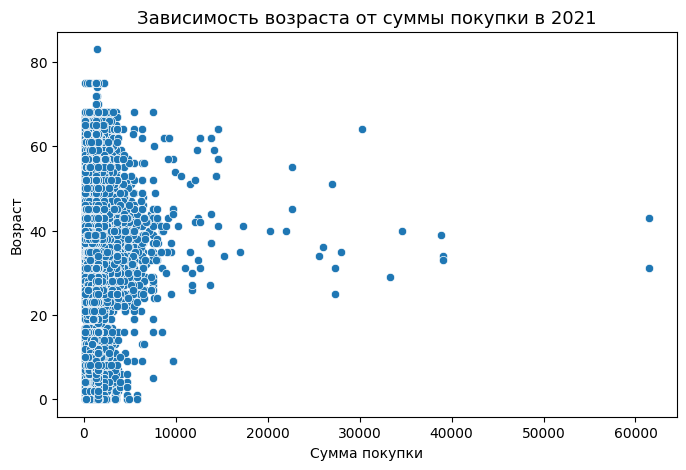

0.0011487286449816218


C:\Users\amane\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amane\anaconda3\envs\da_practicum_env\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


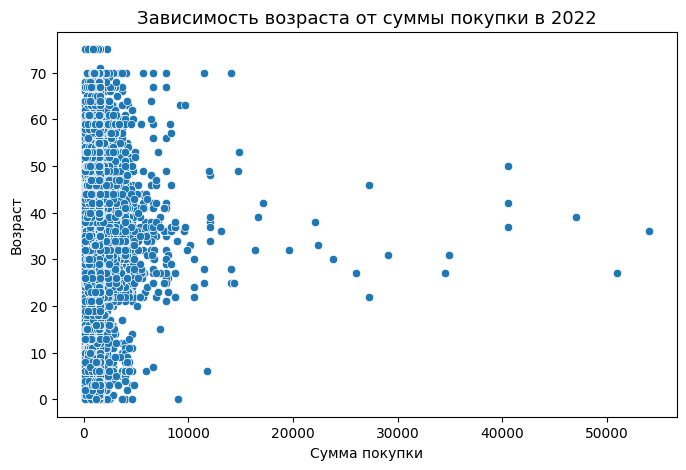

In [ ]:
# выводим корреляцию цены покупки от возраста

print(data.query('year == 2021 & month == [1, 2, 3, 4, 5, 6, 7, 8]')['age_for_service_date'].corr(data['total_amount']))

plt.figure(figsize=(8, 5))

sns.scatterplot(data=data.query('year == 2021'),
                x='total_amount',
                y='age_for_service_date')

plt.title('Зависимость возраста от суммы покупки в 2021', size=13)
plt.xlabel('Сумма покупки', size=10)
plt.ylabel('Возраст', size=10)

plt.show()

print(data.query('year == 2022')['age_for_service_date'].corr(data['total_amount']))

plt.figure(figsize=(8, 5))

sns.scatterplot(data=data.query('year == 2022'),
                x='total_amount',
                y='age_for_service_date')

plt.title('Зависимость возраста от суммы покупки в 2022', size=13)
plt.xlabel('Сумма покупки', size=10)
plt.ylabel('Возраст', size=10)

plt.show()

**Вывод**

Зависимость между возрастом и суммой затрат почти отсутствует, но в 2021 году она была выше (почти в 30 раз).

,amount_category,2021,2022,Разница
0,Выше среднего,12604607,20040664,7436057
1,Дорого,10560511,18355377,7794866
2,Дёшево,2432282,2671547,239265
3,Средне,5620306,9527710,3907404


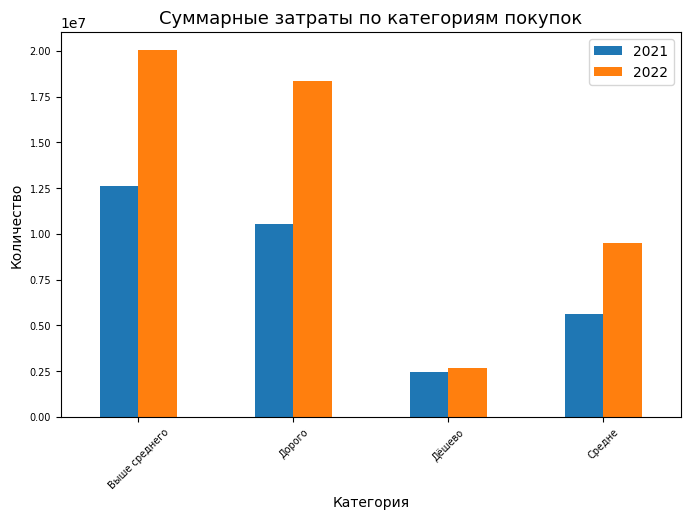

In [ ]:
# группируем категории затрат с суммой затрат по годам

category_amount_year_21 = data.query('year == 2021 & month == [1, 2, 3, 4, 5, 6, 7, 8]').pivot_table(index='amount_category', columns='year', values='total_amount', aggfunc='sum')
category_amount_year_21.reset_index(inplace=True)
category_amount_year_21.columns = ['amount_category', '2021']

category_amount_year_22 = data.query('year == 2022').pivot_table(index='amount_category', columns='year', values='total_amount', aggfunc='sum')
category_amount_year_22.reset_index(inplace=True)
category_amount_year_22.columns = ['amount_category', '2022']

# объединяем 2 таблица с разными годами

table = category_amount_year_21.merge(category_amount_year_22, on='amount_category', how='outer')
table['Разница'] = table['2022'] - table['2021']
display(table)

# строим столбчатый график

table.plot(kind='bar',
           x='amount_category',
           y=['2021', '2022'],
           figsize=(8, 5))

plt.title('Суммарные затраты по категориям покупок', size=13)
plt.xlabel('Категория', size=10)
plt.ylabel('Количество', size=10)
plt.xticks(rotation=45, size=7)
plt.yticks(size=7)

plt.show()

**Вывод**

В 2022 году больше всего увеличилось "дорогих" покупок, в категории "дёшево" почти ничего не изменилось. Значит, что люди чаще начали покупать сразу несколько процедур или просто выше ценой.

amount_category,Выше среднего,Дорого,Дёшево,Средне
age_category,,,,
Долгожитель,1470.0,NaN,NaN,NaN
Молодой,9240568.0,7649582.0,1856566.0,4234819.0
Несовершеннолетний,1356741.0,633120.0,150120.0,505871.0
Пожилой,298593.0,622261.0,64314.0,156304.0
Среднего возраста,1707235.0,1655548.0,361282.0,723312.0


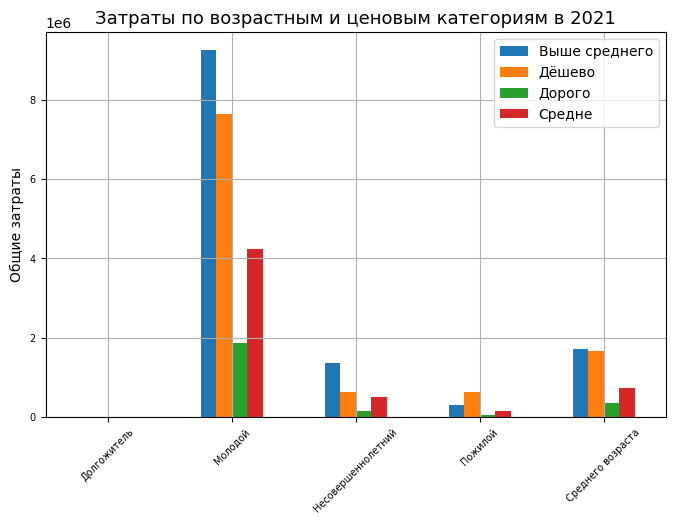

amount_category,Выше среднего,Дорого,Дёшево,Средне
age_category,,,,
Долгожитель,8570,2210,3210,17520
Молодой,15620382,14521981,2013321,7378338
Несовершеннолетний,1700330,843375,179310,645675
Пожилой,293070,448203,60374,182930
Среднего возраста,2418312,2539608,415332,1303247


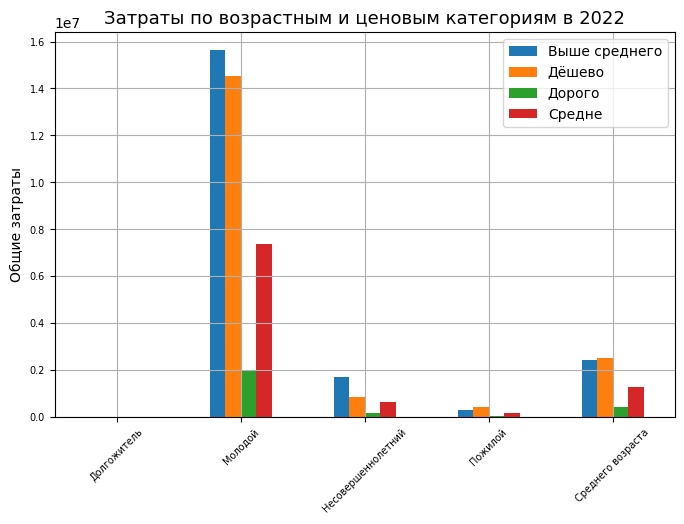

In [ ]:
# отбираем сумму затрат по возрастной и ценовой категориям

category_amount_age = data.query('year == 2021 & month == [1, 2, 3, 4, 5, 6, 7, 8]').pivot_table(index='age_category', columns='amount_category', values='total_amount', aggfunc='sum')
display(category_amount_age)
category_amount_age.reset_index(inplace=True)
category_amount_age.columns=['age_category', 'Выше среднего', 'Дёшево', 'Дорого', 'Средне']

# строим график

category_amount_age.plot(kind='bar',
                         x='age_category',
                         y=['Выше среднего', 'Дёшево', 'Дорого', 'Средне'],
                         grid=True,
                         figsize=(8, 5))

plt.title('Затраты по возрастным и ценовым категориям в 2021', size=13)
plt.xlabel('', size=10)
plt.ylabel('Общие затраты', size=10)
plt.xticks(rotation=45, size=7)
plt.yticks(size=7)
plt.show()

category_amount_age = data.query('year == 2022').pivot_table(index='age_category', columns='amount_category', values='total_amount', aggfunc='sum')
display(category_amount_age)
category_amount_age.reset_index(inplace=True)
category_amount_age.columns=['age_category', 'Выше среднего', 'Дёшево', 'Дорого', 'Средне']

category_amount_age.plot(kind='bar',
                         x='age_category',
                         y=['Выше среднего', 'Дёшево', 'Дорого', 'Средне'],
                         grid=True,
                         figsize=(8, 5))

plt.title('Затраты по возрастным и ценовым категориям в 2022', size=13)
plt.xlabel('', size=10)
plt.ylabel('Общие затраты', size=10)
plt.xticks(rotation=45, size=7)
plt.yticks(size=7)
plt.show()

**Вывод**

Заметно увеличились категории "выше среднего", "дёшево" и "средне" среди молодёжи. У пожилых и долгожителей траты из разряда "дорогие" сократились.

**Вывод по анализу**

- Сумма затрат в 2022 году больше, но к 8 месяцу сильно падает
- Количество покупателей в 2022 году растёт до 4 месяца, после чего снижается до уровня 2021 и ниже
- Женщин, совершивших покупку, увеличилось на 9 тысяч, а мужчин на 5 тысячи
- Затраты женщин тоже больше и в большей степени подвержены колебаниям
- В соотношении возрастных категорий увеличилось только количество молодых почти на 1%
- Затраты молодых клиентов увеличились почти в 2 раза
- Наибольшая прибавка произошла среди молодых женщин и мужчин
- Корреляции между возрастом и суммой покупки почти нет
- В 2022 году больше всего увеличилось "дорогих" покупок (много процедур сразу или с большой стоимостью)
- По возрастным категориям увеличилось в основном среди молодёжи в категориях "выше среднего", "дёшево" и "средне"

## Общий вывод

Задачей проекта был анализ и определение основных драйверов изменения цена лечения в медицинской клинике в 2022 году по сравнению с 2021 годом.

**Этапы исследования**

1. Изучение датафрейма
 - Выгрузка
 - Просмотр общей информации
2. Предобработка данных
 - Заполнение/удаление пропусков
 - Проверка на наличие дубликатов
 - Приведение к единому типу данных
 - Создание вспомогательных столбцов
3. Анализ данных
4. Подготовка презентации

**В результате анализа были сделаны следующие выводы:**

Суммарные затраты на лечение в 2022 году увеличились за счёт увеличения числа клиентов, что является основным драйвером изменения цены лечения. Также увеличились цены на услуги, что возможно связано с инфляцией. Помимо этого, ещё одним драйвером может быть тенденция среди молодёжи, которая всё чаще начинает следить за своим здоровьем, поэтому данная категория приносит больше всего выручки клинике. Чеки с суммой от 1190 до 1540 (выше среднего) приносят больше выручки, чем остальные. Зависимости между суммой затрат и возрастом отсутствует.

Отток клиентов после 4 месяца в 2022 году возможен из-за сезонности, а в 8 месяцы данные представлены только до 20 числа.